## Chapter 3 时间数据可视化
### 3.2 连续型时间数据可视化
#### 3.2.1 阶梯图
**阶梯图**：曲线保持在同一个值，直到发生变化，直接跳跃到下一个值

In [1]:
from pyecharts.charts import Line
import pyecharts.options as opts
# pyecharts 版本号应低于 1.8，否则会强制报错 “所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 ”

line = Line()
datax = [str(x) for x in range(1995, 2010)]  # 横坐标必须是字符串
datay = [0.32, 0.32, 0.32, 0.32, 0.33, 0.33, 0.34, 0.37, 0.37, 0.37, 0.37, 0.39, 0.41, 0.42, 0.44]

line.add_xaxis(datax)
line.add_yaxis('Price', datay, is_step=True)

line.set_global_opts(
    title_opts=opts.TitleOpts(title='美国邮费阶梯图'),
    yaxis_opts=opts.AxisOpts(min_=0.3, max_=0.45)
)

# line.render('step.html') #生成一个html文件
line.render_notebook() #在notebook下方绘制

#### 3.2.2 折线图
**折线图**：直线段将各数据点连接起来组成图形。
折线图适合用于表示趋势。

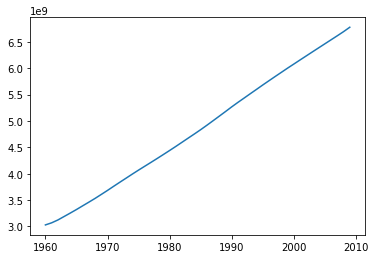

In [2]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt

filename = 'data/world-population.csv'
datax = []
datay = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num !=1:
            # print(reader.line_num, datarow)
            # 从csv文件中读取的数据为字符串，需要转换为int型
            datax.append(int(datarow[0]))
            datay.append(int(datarow[1]))
plt.plot(datax, datay)
plt.show()

折线图也可以使用pyecharts绘制，与阶梯图类似，只需要把参数`is_step`置False即可将阶梯图转为折线图：

In [13]:
import pyecharts.options as opt

filename = 'data/journal.csv'
datax = []
datay = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num !=1:
            # print(reader.line_num, datarow)
            # 从csv文件中读取的y数据为字符串，需要转换为int型
            datax.append(datarow[0])# 横坐标必须是字符串，不用转换
            datay.append(int(datarow[1]))

line1 = Line()

line1.add_xaxis(datax)
line1.add_yaxis('Total Num/yr', datay, is_step=False,label_opts=opt.LabelOpts(is_show=True))
# is_label 置False 后转换为折线图
# label——opts设置节点y坐标在图中不展示（本例中数据过于密集，展示则不够美观）

line1.set_global_opts(
    title_opts=opts.TitleOpts(title='Article Published in SN per year,\n1972-2019',subtitle='@2018301040235'),
    yaxis_opts=opts.AxisOpts(min_=0, max_=150)
)

line1.render_notebook()

#### 3.2.3 拟合曲线
**拟合曲线**：根据给定离散点绘制的曲线，选择适当的曲线类型来拟合观测数据，并用拟合的曲线方程分析两个变量间的关系。

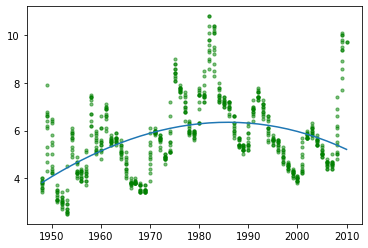

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys

filename = 'data/unemployment-rate-1948-2010.csv'
ya = []
xa = []
try:
    with open(filename) as f:
        reader = csv.reader(f)
        for datarow in reader:
            if reader.line_num != 1:
                ya.append(float(datarow[3]))
                xa.append(int(datarow[1]))
except:
    print('Error reading csv file')
    sys.exit(-1)
plt.figure()  # 创建一个图像
'''
在图像上画一个散点图，其中：
s：size，点的大小；
c：color，点的颜色；
marker：点的形状；
alpha：点的透明度；
'''
plt.scatter(xa[:], ya[:], s=10, c='g', marker='o', alpha=0.5)
'''
在图像上画一条拟合曲线，其中：
np.polyfit用于求拟合函数；
deg：拟合的多项式阶次；
np.polyval根据拟合函数求出对应的拟合曲线；
'''
poly = np.polyfit(xa, ya, deg=3)
plt.plot(xa, np.polyval(poly, xa))
plt.show()

### 3.3 离散型时间数据可视化
#### 3.3.1 散点图
包含的数据越多，呈现的效果就越好。
优点：通过直观醒目的图形方式反应变量间关系的变化形态。

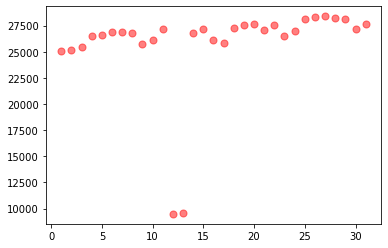

In [6]:
filename = 'data/subscribers.csv'
datay = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num != 1:
            datay.append(int(datarow[1]))  # 数据集中读取的数据为字符串，需要转换为int型

xa = list(range(1, len(datay)+1))
plt.scatter(xa, datay, s=50, c='r', marker='o', alpha=0.5)
plt.show()

#### 3.3.2 柱形图
以高度或长度的差异来显示统计指标数值的一种图形

In [7]:
from pyecharts.charts import Bar
import pyecharts.options as opt
import csv

bar = Bar()
filename = 'data/hot-dog-contest-winners.csv'
datax = []
datay = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num != 1:
            datay.append(float(datarow[2]))  # 数据集中读取的数据为字符串，需要转换为float型
            datax.append(datarow[0])  # pyrcharts中横坐标要求为字符串，故不进行转换
bar.add_xaxis(datax)
bar.add_yaxis('A', datay, label_opts=opt.LabelOpts(is_show=False))
bar.set_global_opts(
    title_opts=opt.TitleOpts(title='柱状图示例'),
)
# bar.render('bar.html')
bar.render_notebook()

#### 3.3.3 堆叠柱形图
数据存在子分类，并且这些子分类相加有意义的话，可以使用堆叠柱形图来表示


In [8]:
from pyecharts.charts import Bar
import pyecharts.options as opt
import csv

bar = Bar()
filename = 'data/hot-dog-places.csv'
datax = []
datay = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        datax.append(datarow)
x = datax[0]
y1 = [float(x) for x in datax[1]]
y2 = [float(x) for x in datax[2]]
y3 = [float(x) for x in datax[3]]

bar.add_xaxis(x)
bar.add_yaxis('A', y1, stack=1)
bar.add_yaxis('B', y2, stack=1)
bar.add_yaxis('C', y3, stack=1)
bar.set_series_opts(label_opts=opt.LabelOpts(is_show=False))

# bar.render('stack.html')
bar.render_notebook()

### 3$^+$ 显示多图的方法
#### 3$^+$.1 Page
1. 创建一个page用来摆放多个图
2. 编辑我们需要展示的图（Bar）
3. 使用page.add()将bar加入该page即可实现一页显示多图

In [9]:
from pyecharts.charts import Page
from pyecharts.charts import Bar
import pyecharts.options as opt
import csv

page = Page()

bar1 = Bar()# 编辑第一个Bar的信息
filename1 = 'data/hot-dog-contest-winners.csv'
data1x = []
data1y = []
with open(filename1) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num != 1:
            data1y.append(float(datarow[2]))  # 数据集中读取的数据为字符串，需要转换为float型
            data1x.append(datarow[0])  # pyrcharts中横坐标要求为字符串，故不进行转换
bar1.add_xaxis(data1x)
bar1.add_yaxis('A', data1y, label_opts=opt.LabelOpts(is_show=False))
bar1.set_global_opts(
    title_opts=opt.TitleOpts(title='柱状图示例'),
)

bar2 = Bar()# 编辑第二个Bar的信息
filename = 'data/hot-dog-places.csv'
data2x = []
data2y = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        data2x.append(datarow)
x2 = data2x[0]
y21 = [float(x) for x in data2x[1]]
y22 = [float(x) for x in data2x[2]]
y23 = [float(x) for x in data2x[3]]

bar2.add_xaxis(x2)
bar2.add_yaxis('A', y21, stack=1)
bar2.add_yaxis('B', y21, stack=1)
bar2.add_yaxis('C', y21, stack=1)
bar2.set_series_opts(label_opts=opt.LabelOpts(is_show=False))

# 将bar1、2分别加入page
page.add(bar1)
page.add(bar2)

# page.render('page.html')
page.render_notebook()

#### 3$^+$.2 Tab
与page不同的是，页面只能同时展示一个图，但是在页面顶部增加了一个bar，可以点击切换多个图，防止页面过长。
1. 创建一个tab用来摆放多个图
2. 编辑我们需要展示的图（Bar）
3. 使用tab.add()将bar加入该tab即可实现一页显示多图

In [10]:
from pyecharts.charts import Tab
from pyecharts.charts import Bar
import pyecharts.options as opt
import csv

tab = Tab()

bar1 = Bar()
filename1 = 'data/hot-dog-contest-winners.csv'
data1x = []
data1y = []
with open(filename1) as f:
    reader = csv.reader(f)
    for datarow in reader:
        if reader.line_num != 1:
            data1y.append(float(datarow[2]))  # 数据集中读取的数据为字符串，需要转换为float型
            data1x.append(datarow[0])  # pyrcharts中横坐标要求为字符串，故不进行转换
bar1.add_xaxis(data1x)
bar1.add_yaxis('A', data1y, label_opts=opt.LabelOpts(is_show=False))
bar1.set_global_opts(
    title_opts=opt.TitleOpts(title='柱状图示例'),
)

bar2 = Bar()
filename = 'data/hot-dog-places.csv'
data2x = []
data2y = []
with open(filename) as f:
    reader = csv.reader(f)
    for datarow in reader:
        data2x.append(datarow)
x2 = data2x[0]
y21 = [float(x) for x in data2x[1]]
y22 = [float(x) for x in data2x[2]]
y23 = [float(x) for x in data2x[3]]

bar2.add_xaxis(x2)
bar2.add_yaxis('A', y21, stack=1)
bar2.add_yaxis('B', y21, stack=1)
bar2.add_yaxis('C', y21, stack=1)
bar2.set_series_opts(label_opts=opt.LabelOpts(is_show=False))

tab.add(bar1, 'Bar')
tab.add(bar2, 'Stack')

# tab.render('tab.html')
tab.render_notebook()